##  SEIR-MODEL OF TB IN KENYA

### Definition of terms used in the codes

$b$ - Total birth rate.

$\gamma$ - Infection rate.

$k$ - Rate of transition from exposed to infections.

$\alpha$ - Recovery rate

$\delta$ - Death rate

$m$ - Rate of immigration of individuals into exposed
 
$n$ - Rate of immigration of individuals into infectives

#### Sources of the  values of the  parameters

1. https://knoema.com/atlas/Kenya/topics/Health/Risk-factors/Tuberculosis-death-rate

2. http://www.stoptb.org/resources/cd/KEN_Dashboard.html

3. https://www.statista.com/statistics/976967/crude-birth-rate-in-kenya/

4. https://www.indexmundi.com/kenya/demographics_profile.html

5. https://www.who.int/3by5/TBfactsheet.pdf 



### **Remarks**

$\rightarrow$ Exposed number of individuals was estimated from the total number of people living with HIV, and the same applies to the rate of transition from exposed to infections.

$\rightarrow$ The total birth rate was calculated as follows:-

 -using the rate of birth rate per woman in life time which is 3.43, per year is $\frac{3.43}{70}= 0.049$ where, 70years is the life expectancy.
 
 -number of women $=27,000,000$
 
 -total population $= 52,000,000$
 
 Therefore, total births in a year $= 0.049\times 27,000,000=1,323,000$
 
 Birth rate (b) $=  \frac{1,323,000}{52,000,000}=0.02544$
 

 ### - Model without immigration  (Nominal system/unperturbed system)

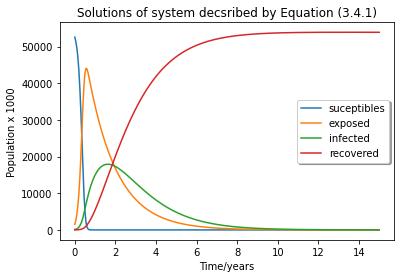

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# z-unperturbed system

def tuberclosis_KE(t, z, gamma= 0.002663, alpha= 0.85, delta=0.00037, k= 0.7, b=0.02544):
    S,E,I,R = z
    return [b- delta*S - S*I*gamma, gamma*S*I - (delta+k)*E, k*E - (delta+alpha)*I, alpha*I-delta*R]

#Solving differential equations given initial condition
sol = solve_ivp(tuberclosis_KE, [0, 15], [52570,1500,140, 0], args=(0.002663,0.85,0.00037,0.7,0.02544),
                dense_output=True)

#Computing solution and plotting it.

t = np.linspace(0, 15, 300)
z = sol.sol(t)
import matplotlib.pyplot as plt
plt.plot(t, z.T)
plt.xlabel('Time/years')
plt.ylabel('Population x 1000')

plt.legend(['suceptibles', 'exposed', 'infected', 'recovered'], shadow=True)
plt.title('Solutions of system decsribed by Equation (3.4.1)')
plt.savefig("solution_1")
plt.show()

### - Model with immigration (Perturbed system)

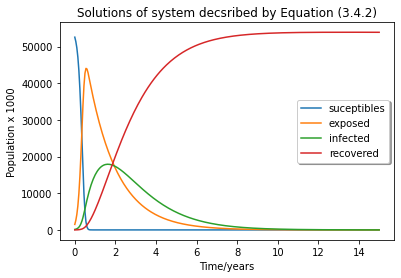

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# z_p- denotes the system with immigration
def tuberclosis_KE_Imm(t, z_p, gamma= 0.002663, alpha= 0.85, delta=0.00037, k= 0.85, b=0.02544, m=0.01, n=0.002):
    S,E,I,R = z_p
    return [
     b - delta*S - S*I*gamma, gamma*S*I - (delta+k)*E+m, k*E - (delta+alpha)*I+n,
    alpha*I-delta*R]

#Solving differential equations given initial condition
pert= solve_ivp(tuberclosis_KE_Imm, [0,15], [52570,1500,140, 0], args=(0.002663,0.85,0.00037,0.7,0.02544),
                dense_output=True)

#Computing solution and plotting it.

t = np.linspace(0, 15, 300)
z_p= pert.sol(t)
plt.plot(t, z_p.T)
plt.xlabel('Time/years')
plt.ylabel('Population x 1000')
plt.legend(['suceptibles', 'exposed', 'infected', 'recovered'], shadow=True)
plt.title('Solutions of system decsribed by Equation (3.4.2)')
plt.savefig("solution_2")
plt.show()

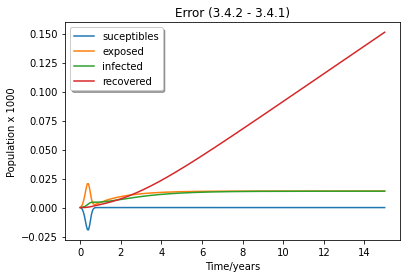

In [10]:
#Getting the system difference and plotting
error=(z_p-z)
plt.plot(t, error.T)
plt.xlabel('Time/years')
plt.ylabel('Population x 1000')
plt.legend(['suceptibles', 'exposed', 'infected', 'recovered'], shadow=True)
plt.title('Error (3.4.2 - 3.4.1)')
plt.savefig("solution_3")
plt.show()

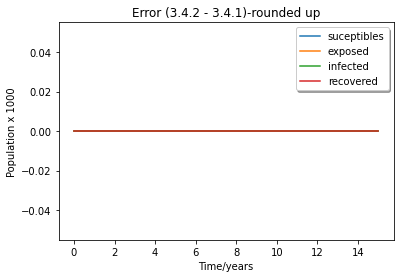

In [11]:
#rounding up the systems difference and plotting
error_r=np.round(z_p-z)
plt.plot(t, error_r.T)
plt.xlabel('Time/years')
plt.ylabel('Population x 1000')
plt.legend(['suceptibles', 'exposed', 'infected', 'recovered'], shadow=True)
plt.title('Error (3.4.2 - 3.4.1)-rounded up')
plt.savefig("solution_4")
plt.show()